# Challenge: topic modeling using supervised learning

## 1. Model

We are going to train a Multinomial Naive Bayes model for topic prediction.

The Multinomial Naive Bayes model is a probabilistic classifier based on Bayes' Theorem, commonly used for discrete data like word counts in text classification. It assumes that the features (for example, word occurrences) are conditionally independent given the class and follows a multinomial distribution for the feature likelihoods.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

## 2. Data

To train a machine learning model, we need data.

The training data is provided and consists of articles extracted from the online news portal https://www.pravda.ru/.

In [ ]:
import pandas as pd

path_to_dataset = 'pravda_first_semester_2024.tsv'
df = pd.read_csv(path_to_dataset, sep='\t')
df.head(2)

,publication_time,headline,lead,content,section
0,2024-03-07 11:55:00,Глава академии Генштаба ВС РФ спрогнозировал н...,Генерал-полковник Владимир Зарудницкий в своём...,Генерал-полковник Владимир Зарудницкий в своём...,politics
1,2024-05-13 19:19:00,"Фитнес-тренер назвала заболевания, при которых...",Фитнес-тренер Елена Соболь поделилась своими м...,Фитнес-тренер Елена Соболь поделилась своими м...,sport


### Labels (y)

To train a model using **supervised learning** we need **labeled data**.

**Labels** are the true output values or target variables that the model learns to predict.

The values from the column **section** can be taken as **labels**.

Keep in mind that the dataset might be imbalanced: some values may be underrepresented or overrepresented compared to others.

In a situation where you have three topics with significantly different frequencies, the classifier might become biased towards the more frequent classes. This could lead to poor predictions for the less frequent topics.

In [ ]:
df['section'].value_counts()

,count
section,
sport,4571
economics,4398
politics,1116


### Features (X)

Features are the input variables (also called attributes or predictors) that the algorithm uses to make predictions.

You can use the text from the **headline**, **lead**, or **content** columns as input features, or perhaps a combination of them. The choice is yours.

In [ ]:
features = df['headline']
features

,headline
0,Глава академии Генштаба ВС РФ спрогнозировал н...
1,"Фитнес-тренер назвала заболевания, при которых..."
2,Серебро выгоднее золота? Менее гламурный метал...
3,"Сергей Карякин считает, что турнир претенденто..."
4,"""Газпром"" выступил против международного арбит..."
...,...
10080,Еврокомиссия может отложить принятие новых сан...
10081,Латвийский фигурист высказался против допуска ...
10082,Источник: дата годового отчета Центробанка на ...
10083,"План тренировок, который позволяет знаменитому..."


### Numerical representation

A machine learning model cannot use text data as input.

We can create a vector representation from text by constructing a Document-Term Matrix (DTM) using techniques like TF-IDF.


In the resulting DTM matrix:

1) The number of **rows** is equal to the number of documents (news articles, in this case).

2) The number of **columns** is equal to the unique terms (the size of the vocabulary).


**ADVICE:**

Before constructing the DTM, it can be helpful to apply some text preprocessing steps, such as text cleaning, convert the text to lowercase, stemming, lemmatization, and removing stop words. This may improve the model's performance.

In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

dtm = vectorizer.fit_transform(features)
dtm

CPU times: user 389 ms, sys: 1.1 ms, total: 390 ms
Wall time: 475 ms


<10085x22705 sparse matrix of type '<class 'numpy.float64'>'
	with 97046 stored elements in Compressed Sparse Row format>

## 3. Train

First, we need to define the input features **(X)** and the true labels **(y)**

In [ ]:
X = dtm
y = df['section']

We are now ready to train the model using the 'fit' method

In [ ]:
model.fit(X, y)

MultinomialNB()

## 4. Inference

Once the model is trained, it can be used on new data.

In the example below, we will take three headlines from another news portal: https://russian.rt.com/news

In [ ]:
new_articles = [
    'Вместо долларов и евро: в Минфине посоветовали россиянам покупать золото для сбережения денег',
    'Форменное избиение: Муртазалиев нокаутировал Цзю в третьем раунде и защитил чемпионский пояс IBF',
    'Глава Минобороны Франции: Макрон снабжает Украину старыми вооружениями'
]

new_y = ['economics', 'sport', 'politics']

new_X = vectorizer.transform(new_articles)

new_y_pred = model.predict(new_X)
new_y_pred

array(['economics', 'sport', 'politics'], dtype='<U9')

## 5. Test

The model appears to be working, but we need to test it before publishing it.

Let's check the common metrics.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(new_y, new_y_pred, digits=4))

              precision    recall  f1-score   support

   economics       1.00      1.00      1.00         1
    politics       1.00      1.00      1.00         1
       sport       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



A confusion matrix offers a detailed breakdown of the correct and incorrect predictions for each class, allowing you to understand the types of errors your model makes.

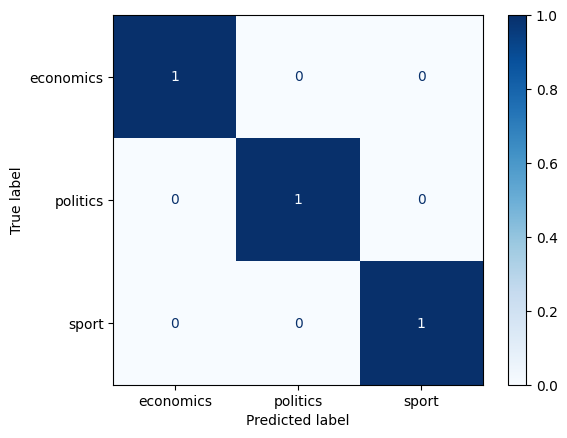

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(new_y, new_y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues);

The model's performance was perfect! However, the testing data was too small to draw any conclusions. We may need to start the process again and set aside some training data to create a testing set.

**Retrain, assess the model's performance, and claim your chocolate!**

## It is not difficult to train a ML model; it is challenging to obtain a model whose predictions generalize well to new data.